# Fırın Sistemlerinde Sıcaklık, Fan, Rulo Sensör Verileri ile Arıza Tahmin Modeli 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("yeni_veri/ariza_tahmin_modeli_sicaklik_fan_rulo_icin_veri.csv")

In [6]:
df.shape   

(22140, 63)

In [7]:
df.columns

Index(['prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
       'c

In [8]:
df['hedef'] = df['uyari'].apply(lambda x: 0 if x == '✅ Normal' else 1)

In [9]:
## Test aşamasında veri almak için
df.to_csv("yeni_veri/test_ariza_tespit_model_veriler_isi_fan_rulo.csv", index=False)

In [10]:
features = [
    'giris_isi', 'on_isitma_isi', 'sogutma1_isi',
    'sogutma2_isi', 'sogutma3_isi',
    'rulo_frekans_hz', 'giris_per.fan_hz'
]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[features]
y = df['hedef']  # İkili sınıflandırma ise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5212
           1       1.00      1.00      1.00      1430

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


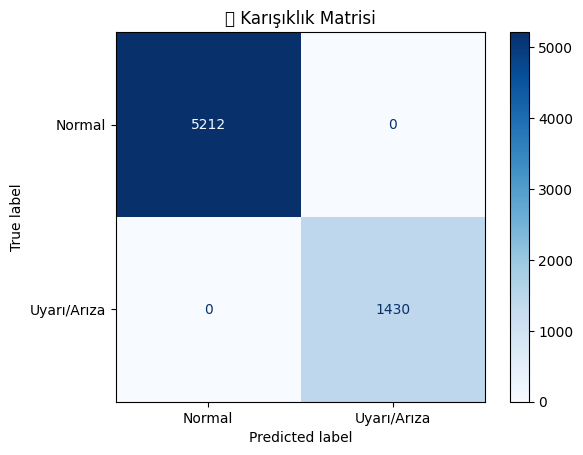

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      5212
 Uyarı/Arıza       1.00      1.00      1.00      1430

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 📊 Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Uyarı/Arıza"])
disp.plot(cmap="Blues")
plt.title("🔍 Karışıklık Matrisi")
plt.show()

# 
print(classification_report(y_test, y_pred, target_names=["Normal", "Uyarı/Arıza"]))

In [13]:
# Veri setinden bir örnek satır al
test_sample = df[features].iloc[[1410]]  # örnek olarak ilk satır

# Tahmin yap
prediction = model.predict(test_sample)

# Tahmini etiketle göster
etiket_map = {0: "✅ Normal", 1: "🚨 Uyarı"}
print("Tahmin:", etiket_map[prediction[0]])


Tahmin: 🚨 Uyarı


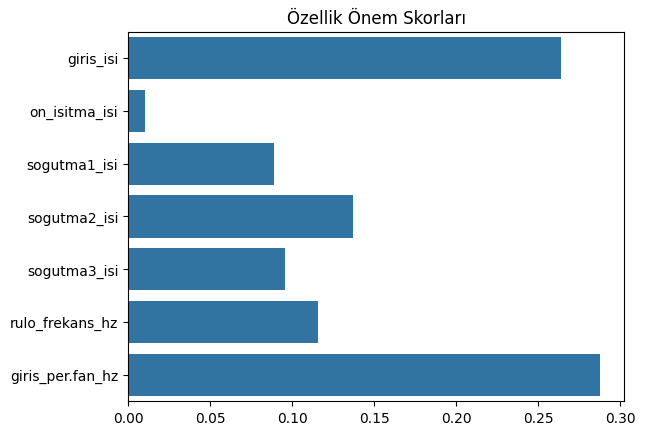

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Özellik Önem Skorları")
plt.show()


In [15]:
top_features = ['giris_per.fan_hz', 'giris_isi', 
                   'sogutma2_isi', 'rulo_frekans_hz']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[top_features]
y = df['hedef']  # İkili sınıflandırma ise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5212
           1       0.99      0.99      0.99      1430

    accuracy                           1.00      6642
   macro avg       0.99      0.99      0.99      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


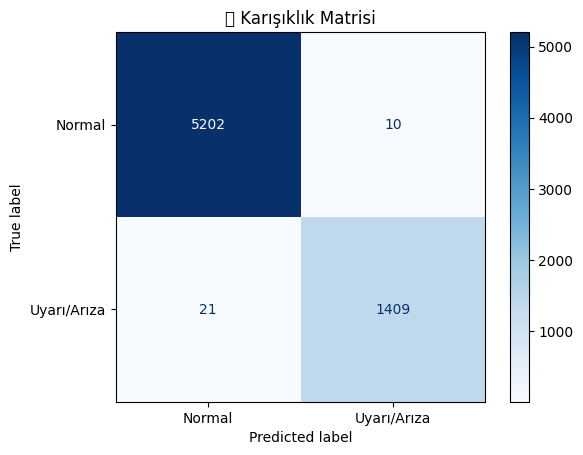

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      5212
 Uyarı/Arıza       0.99      0.99      0.99      1430

    accuracy                           1.00      6642
   macro avg       0.99      0.99      0.99      6642
weighted avg       1.00      1.00      1.00      6642



In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 📊 Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Uyarı/Arıza"])
disp.plot(cmap="Blues")
plt.title("🔍 Karışıklık Matrisi")
plt.show()

# 📝 Ek Performans Raporu
print(classification_report(y_test, y_pred, target_names=["Normal", "Uyarı/Arıza"]))

In [18]:
# Veri setinden bir örnek satır al
test_sample = df[top_features].iloc[[1410]]  # örnek olarak ilk satır

# Tahmin yap
prediction = model.predict(test_sample)

# Tahmini etiketle göster
etiket_map = {0: "✅ Normal", 1: "🚨 Uyarı"}
print("Tahmin:", etiket_map[prediction[0]])


Tahmin: 🚨 Uyarı
